In [2]:
import pandas as pd

In [3]:
from sqlite3 import connect

In [4]:
opsim_db = connect('baseline_v2.0_10yrs.db')

In [5]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [6]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [7]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [8]:
r_band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations WHERE filter == "r"', opsim_db)

In [9]:
r_band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,770,355.783117,-79.644018,60218.356921,-1,r,22.039985
1,771,338.205026,-80.387745,60218.357414,-1,r,22.053388
2,772,349.857034,-82.633511,60218.357890,-1,r,22.115278
3,773,336.319706,-85.448079,60218.358364,-1,r,22.025564
4,774,9.600147,-87.474001,60218.358911,-1,r,22.023105
...,...,...,...,...,...,...,...
464846,2086903,324.507982,-0.970535,63870.068633,-1,r,23.669905
464847,2086904,322.189374,0.548445,63870.069080,-1,r,23.655921
464848,2086905,319.880983,2.065350,63870.069526,-1,r,23.635941
464849,2086906,322.437543,3.728057,63870.069973,-1,r,23.508767


In [10]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

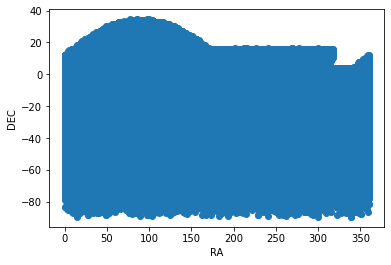

In [11]:
plt.scatter(r_band_obs['fieldRA'], r_band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [12]:
import matplotlib as npl

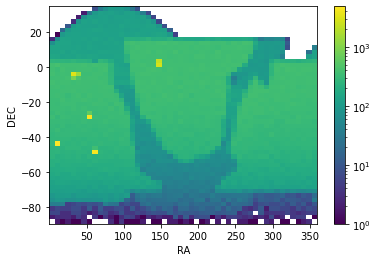

In [13]:
plt.hist2d(r_band_obs['fieldRA'], r_band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [14]:
import numpy as np

In [15]:
find_max_RA = np.max(r_band_obs['fieldRA'])
find_min_RA = np.min(r_band_obs['fieldRA'])
find_max_DEC = np.max(r_band_obs['fieldDec'])
find_min_DEC = np.min(r_band_obs['fieldDec'])
num_bins = 50

In [16]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins+1)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins+1)

In [17]:
RA_bins = np.digitize(r_band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([50, 47, 49, ..., 45, 45, 46])

In [18]:
DEC_bins = np.digitize(r_band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([ 5,  4,  3, ..., 37, 38, 37])

In [19]:
r_band_obs['RABins'] = RA_bins
r_band_obs['DECBins'] = DEC_bins

In [20]:
new_field_id = (RA_bins-1) * 50 + DEC_bins
r_band_obs['fieldId'] = new_field_id
r_band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,770,355.783117,-79.644018,60218.356921,2455,r,22.039985,50,5
1,771,338.205026,-80.387745,60218.357414,2304,r,22.053388,47,4
2,772,349.857034,-82.633511,60218.357890,2403,r,22.115278,49,3
3,773,336.319706,-85.448079,60218.358364,2302,r,22.025564,47,2
4,774,9.600147,-87.474001,60218.358911,51,r,22.023105,2,1
...,...,...,...,...,...,...,...,...,...
464846,2086903,324.507982,-0.970535,63870.068633,2286,r,23.669905,46,36
464847,2086904,322.189374,0.548445,63870.069080,2237,r,23.655921,45,37
464848,2086905,319.880983,2.065350,63870.069526,2237,r,23.635941,45,37
464849,2086906,322.437543,3.728057,63870.069973,2238,r,23.508767,45,38


In [21]:
r_band_obs.query('fieldId == 2403')

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
2,772,349.857034,-82.633511,60218.357890,2403,r,22.115278,49,3
187117,846124,349.132762,-83.345848,61682.142242,2403,r,23.833470,49,3
189023,860288,349.770490,-84.147058,61703.077226,2403,r,23.336416,49,3
373690,1680668,349.123067,-82.933787,63159.185750,2403,r,23.423731,49,3
416803,1875208,346.865503,-83.230118,63536.152786,2403,r,23.918868,49,3


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [23]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [24]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [25]:
sun = Sed()
sun.readSED_flambda('/home/jovyan/uw-premap-2022-photoz/data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [29]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [30]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [31]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [32]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())

(0.00874223082344965, 0.039237324048381955)

In [35]:
mag_error, gamma = SignalToNoise.calcMagError_m5(24., lsst['r'], 22.115278, PhotometricParameters())
mag_error_2, gamma = SignalToNoise.calcMagError_m5(24., lsst['r'], 23.833470, PhotometricParameters())
print(mag_error)
print(mag_error_2)

0.8226078108252262
0.22735898453086878
